### PCA vs LDA

Both Linear Discriminant Analysis (LDA) and PCA are linear transformation methods. PCA yields the directions (principal components) that maximize the variance of the data, whereas LDA also aims to find the directions that maximize the separation (or discrimination) between different classes, which can be useful in pattern classification problem (PCA “ignores” class labels). 
In other words, PCA projects the entire dataset onto a different feature (sub)space, and LDA tries to determine a suitable feature (sub)space in order to distinguish between patterns that belong to different classes.

### A Summary of the PCA Approach

* Standardize the data.
* Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Value Decomposition.
* Sort eigenvalues in descending order and choose the k eigenvectors that correspond  
  to the k
  largest eigenvalues where k is the number of dimensions of the new feature subspace  
  (k≤d).
* Construct the projection matrix W from the selected k eigenvectors.
* Transform the original dataset X via W to obtain a k-dimensional feature subspace Y

### Preparing the Iris Dataset

In [1]:
import pandas as pd

df = pd.read_csv(\
                filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                header = None,
                sep=',')
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how='all', inplace=True)

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

In [6]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
y[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

### Exploratory Visualization

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

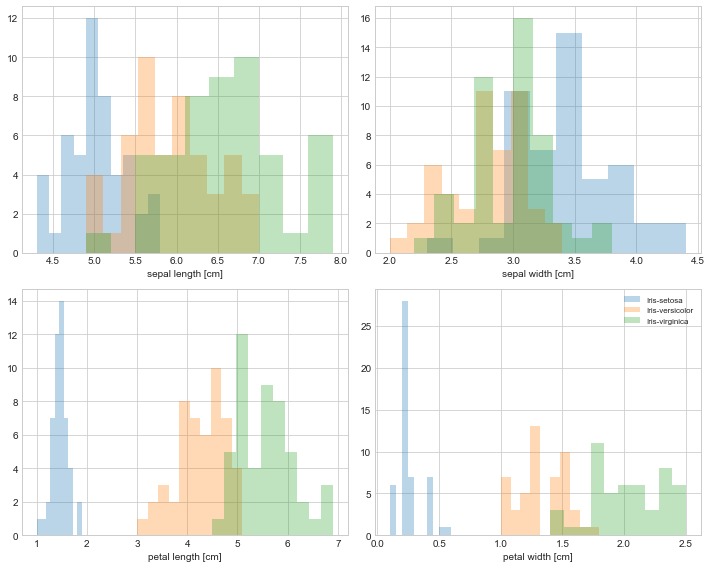

In [11]:
label_dict = {1:'Iris-setosa', 2:'Iris-Versicolor', 3:'Iris-Virginica'}
feature_dict = {0:'sepal length [cm]',
               1:'sepal width [cm]',
               2:'petal length [cm]',
               3:'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
            label = lab,
            bins=10,
            alpha=0.3,)
            
        plt.xlabel(feature_dict[cnt])
        
    plt.legend(loc='upper right', fancybox=True, fontsize=8)
    
    plt.tight_layout()
    plt.show()

### Standardizing

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### 1. Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

### Covariance Matrix

Σ=(1/(n−1))((X−x¯)T(X−x¯))

In [13]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s ' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]] 


In [15]:
print('Numpy covariance matrix : \n%s' %np.cov(X_std.T))

Numpy covariance matrix : 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [17]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s '%eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


### Correlation Matrix

the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix.

In [18]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [19]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


* Eigendecomposition of the covariance matrix after standardizing the data.
* Eigendecomposition of the correlation matrix.
* Eigendecomposition of the correlation matrix after standardizing the data.

### Singular Value Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Value Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [20]:
u, s, v = np.linalg.svd(X_std.T)

print(u)
print(s)
print(v)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
[20.89551896 11.75513248  4.7013819   1.75816839]
[[ 1.08374515e-01  9.98503796e-02  1.13323362e-01 ... -7.27833114e-02
  -6.58701606e-02 -4.59092965e-02]
 [-4.30198387e-02  5.57547718e-02  2.70926177e-02 ... -2.26960075e-02
  -8.64611208e-02  1.89567788e-03]
 [ 2.59377669e-02  4.83370288e-02 -1.09498919e-02 ... -3.81328738e-02
  -1.98113038e-01 -1.12476331e-01]
 ...
 [ 5.42576376e-02  5.32189412e-03  2.76010922e-02 ...  9.89545817e-01
  -1.40226565e-02 -7.86338250e-04]
 [ 1.60581494e-03  8.56651825e-02  1.78415121e-01 ... -1.24233079e-02
   9.52228601e-01 -2.19591161e-02]
 [ 2.27770498e-03  6.44405862e-03  1.49430370e-01 ... -6.58105858e-04
  -2.32385318e-02  9.77215825e-01]]


### 2. Selecting Principal Components

PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code:

In [21]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    
print('Everything ok!')

Everything ok!


we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [29]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x : x[0], reverse=True)

print('Eigenvalues in descending order: ')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order: 
2.9108180837520528
0.9212209307072254
0.1473532783050958
0.020607707235624842


### Explained Variance

“how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [30]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

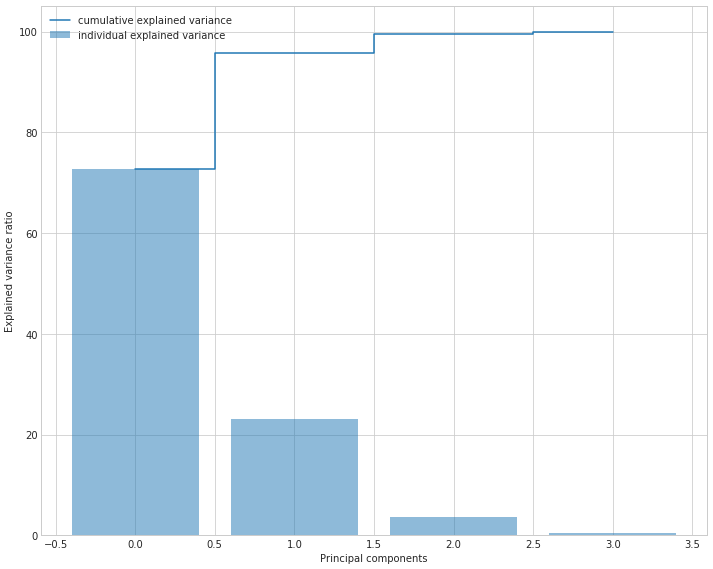

In [31]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    
    plt.bar(range(4), var_exp, alpha=0.5, align='center',
           label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
            label='cumulative explained variance')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

### Projection Matrix

The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k
-dimensional eigenvector matrix W

In [33]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4, 1),
                     eig_pairs[1][1].reshape(4, 1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [28]:
for i in range(len(eig_pairs)):
    print(eig_pairs[i][1])

[]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]]


### 3. Projection Onto the New Feature Space

In this last step we will use the 4×2 -dimensional projection matrix W to transform our  
samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples

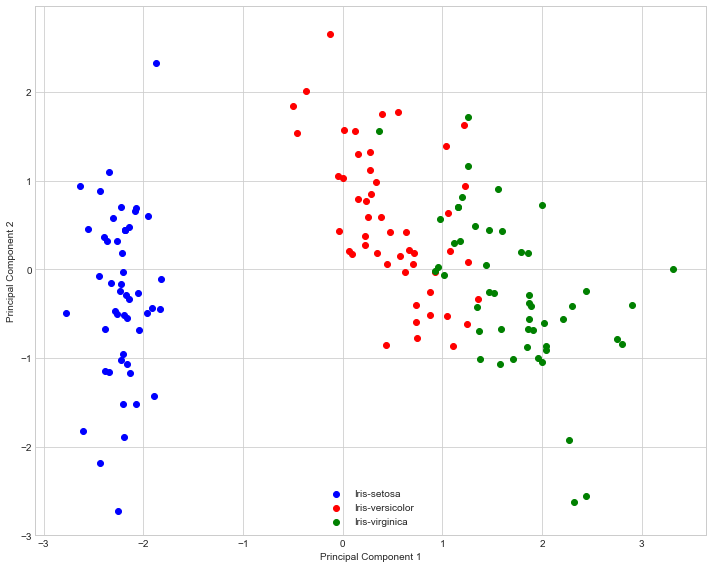

In [35]:
Y = X_std.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 8))
    
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                       ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                   Y[y==lab, 1],
                   label=lab,
                   c=col)
        
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### ShortCut - PCA in scikit-learn

In [38]:
from sklearn.decomposition import PCA as skPCA

sk_pca = skPCA(n_components=2)
Y_sklearn = sk_pca.fit_transform(X_std)

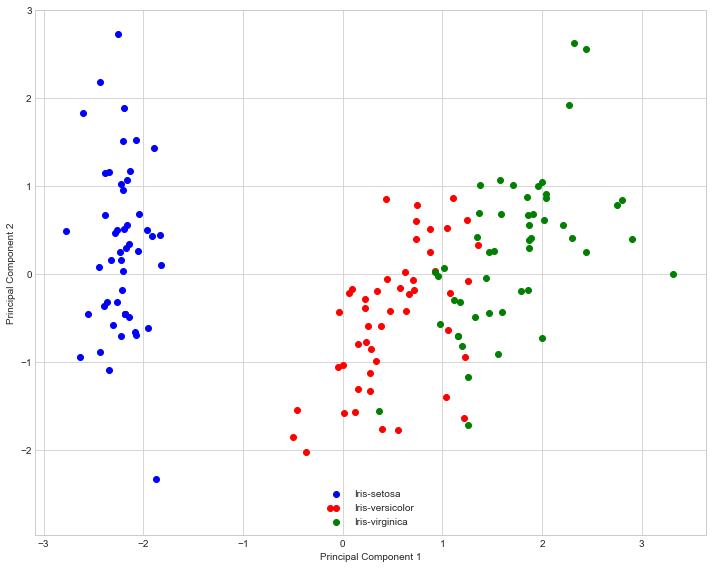

In [39]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10 , 8))
    
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                       ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                   Y_sklearn[y==lab, 1],
                   label=lab,
                   c=col)
        
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()